# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

In [ ]:
A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset 
A base contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens.

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


In [ ]:
1 - Quais são os gêneros de filmes melhor avaliados?
2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?
3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?
4 - Tem relação de custo de produção do filme com as melhores avaliações?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [1]:
# importando as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Leitura do dataset
df = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')
filmes = df

In [38]:
# Pré-visaulização do dataset
filmes.head(3)

,adulto,despesas,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,...,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,novo_pais_producao,novo_idiomas_falados,novo_cia_producao,ano_lancamento
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,False,False,False,False,False,False,[United States of America],[English],[Pixar Animation Studios],1995
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,False,False,False,False,False,False,[United States of America],"[English, Français]","[TriStar Pictures, Teitler Film, Interscope Co...",1995
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,True,False,False,False,False,False,[United States of America],[English],"[Warner Bros., Lancaster Gate]",1995


In [ ]:
# tamanho da nossa base
print('Número de linhas e número de colunas:', filmes.shape)

In [ ]:
filmes.describe()

In [ ]:
filmes.dtypes

In [ ]:
# --------------------------- TRATAMENTO DE DADOS NULOS ---------------------

In [ ]:
filmes.isnull().sum()

In [ ]:
# PERCENTUAL DE ELEMENTOS NULOS
round(filmes.isnull().mean() * 100,2)

In [3]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
filmes.drop(['belongs_to_collection'],axis = 1, inplace = True)
filmes.drop(['homepage'],axis = 1, inplace = True)
filmes.drop(['poster_path'],axis = 1, inplace = True)     
filmes.drop(['tagline'],axis = 1, inplace = True)     

In [4]:
# REMOVE ELEMENTOS QUE POSSUEM DADOS NULOS
filmes = filmes.dropna()

In [5]:
# resetando os índices
filmes = filmes.reset_index()

In [ ]:
# validando se ainda há registros nulos
filmes.isnull().sum()

In [ ]:
# tamanho da base após exclusão de features e registros nulos
print('Número de linhas e número de colunas:', filmes.shape)

In [6]:
# TRANSFORMANDO A FEATURE "adult" EM BINÁRIO, ONDE 'True' = 0 (classificação livre) e 'False' = 1 (são somente para adultos)
filmes["classificacao"] = filmes["adult"].apply(lambda x: 1 if x == "False" else 0)

In [7]:
# VALIDANDO TRANSFORMAÇÃO da feature "adult"
filmes[["classificacao", "adult","original_title"]].head(3)

,classificacao,adult,original_title
0,1,False,Toy Story
1,1,False,Jumanji
2,1,False,Grumpier Old Men


In [8]:
# -------------------- RENOMEANDO AS FEATURES --------------------------
# renomear as coluna e usar todas com caixa baixa para padronizar
filmes = filmes.rename(columns={'adult': "adulto", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

In [ ]:
# ------------- Transformar as features que são um dicionário em uma lista --------------

In [9]:
# feature genero


# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['genero'] = filmes['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_genero'] = filmes['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_genero", "genero", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_genero)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = filmes.novo_genero[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = filmes.novo_genero[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

In [10]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(filmes.novo_genero).transform(filmes.novo_genero)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [ ]:
df_novo.head(1)

In [11]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([filmes, df_novo], axis=1)

In [12]:
# copiando o conteúdo do novo dataframe para o filme utilizado
filmes = horizontal_stack.copy()

In [ ]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
filmes.columns

In [13]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
filmes = filmes.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})


In [ ]:
# validando a alteração do nome das features
filmes.columns

In [ ]:
# Verificando o tamanho da base após a transformação da features de genero
print('Número de linhas e número de colunas:', filmes.shape)

In [14]:
# Feature pais_producao


# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['pais_producao'] = filmes['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_pais_producao'] = filmes['pais_producao'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = filmes.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = filmes.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print (pais_producao_unicos)

In [15]:
# Feature idiomas_falados

# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['idiomas_falados'] = filmes['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_idiomas_falados'] = filmes['idiomas_falados'].apply(get_list) 

In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(filmes.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = filmes.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = filmes.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

In [16]:
# Feature cia_producao


# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
filmes['cia_producao'] = filmes['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
filmes['novo_cia_producao'] = filmes['cia_producao'].apply(get_list) 


In [ ]:
# VALIDANDO TRANSFORMAÇÃO
filmes[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

In [ ]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(filmes.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    cia = filmes.novo_cia_producao[x]
    tam_cia = len(cia)
    i = z = b = 0
    while (i < tam_cia): 
        cada_cia_registo = filmes.novo_cia_producao[x][i]
        if (not cada_cia_registo in cia_unicos):      
            cia_unicos.append(cada_cia_registo) 
            z +=1
        i += 1        
    x += 1

print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

In [ ]:
# verificando os valores da feature status
filmes.status.unique()

In [17]:
# Converter a data de lançamento para ter somente o ano
data = filmes['data_lancamento'] # se o resultado for uma lista das datas do banco
ano = [a.split('-')[0] for a in data]
filmes['ano_lancamento'] = ano

# validando a transformação
filmes[['data_lancamento','ano_lancamento']].head(2)

,data_lancamento,ano_lancamento
0,1995-10-30,1995
1,1995-12-15,1995


In [ ]:
# validando se ainda há registros nulos
filmes.isnull().sum()

In [ ]:
# ------------------- ALTERAÇÃO DO TIPOS DAS FEATURES ---------------

In [ ]:
filmes.dtypes

In [18]:
# converter variáveis object para categoricas
filmes.adulto = filmes.adulto.astype('category')
filmes.titulo_original = filmes.titulo_original.astype('category')
filmes.status = filmes.status.astype('category')
filmes.titulo = filmes.titulo.astype('category')

In [19]:
# converter variáveis objecto para float ou inteiro
filmes.popularidade = filmes.popularidade.astype('float64')
filmes.despesas = filmes.despesas.astype('float64')
filmes.receita = filmes.receita.astype('float64')
filmes.qtde_votos = filmes.qtde_votos.astype('int64')
filmes.id = filmes.id.astype('int64')
filmes.ano_lancamento = filmes.ano_lancamento.astype('int64')

In [20]:
# o dataset está com duas colunas index. Ambas serão excluídas
filmes.drop(['index'],axis = 1, inplace = True)

In [ ]:
filmes.dtypes

In [ ]:
# ------------------------ DESCRIÇÃO DAS FEATURES --------------------
# descrição das features
'adulto' - se o filme é para adulto ou não 
'despesas' - valor gasto na produção e divulgação dos vídeos
'genero' - qual é o gêncero do filme.
'id' - número que identifica o filme
'imdb_id' - número unico que identifica o filme na base do imdb
'lingua_original' - qual é o idioma original do filme. 
'titulo_original' - titulo original do filme
'descricao' - descrição do filme
'popularidade' - qual é a popularidade do filme
'cia_producao' - qual foi a companhia que produziu o filme. 
'pais_producao' - qual foi o país que produziu o filme.
'data_lancamento' - qual foi a data de lançamento do filme
'receita' -  qual foi a receita obtida com o filme
'duracao' - qual é a duração do filme em minutos
'idiomas_falados' - quais são os idiomas falados no filme. 
'status' - status do filmes. 
'slogan' - qual é o slogan do filme.
'titulo' - qual é o título do filme
'video' - se tem o video ou não do traile ????????? precisa desta feature ?????
'media_votos' - qual é a média de votos dada pelos usuários
'qtde_votos' - qual foi a quantidade de votos

# Tipos de features e seus possíveis valores
A) Variáveis categóricas - O dataset contém 8 variáveis:
1 - adulto - contém dois valores: 'false' = 1, 'true' = 0
2 - genero -  contém 29 valores possíveis. Cada registro foi transformado em feature
3 - lingua_original -possui 90 valores possíveis.
4 - cia_producao   - possui 19368 valores possíveis.
5 - pais_producao  - 155 valores possíveis.
6 - idiomas_falado - 73 valores possíveis.
7 - status - 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'          
8 - video - False, True, nan
9 - novo_genero 
10 - novo_pais_producao
11 - novo_idiomas_falados
12 - novo_cia_producao

B) Variáveis discretas - O dataset contém 13 variáveis: 
despesas, id, imdb_id, titulo_original, descricao,data_lancamento,popularidade,  
receita, duracao(minutos), slogan, titulo, media_votos, qtde_votos          

In [ ]:
# Tamanho final da base após o tratamento dos dados/features
print('Número de linhas e número de colunas:', filmes.shape)

In [ ]:
filmes.columns

In [ ]:
### SE DER TEMPO, VOU TRABALHAR ESTE CAMPO E RODAR UM ALGORITMO QUE TRATE CAMPO TEXTO
filmes['descricao'].describe()

In [ ]:
filmes

In [ ]:
# No trabalho serão utilizadas as features: 
        'despesas', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'receita', 'duracao',
        'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'classificacao', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental', 'novo_pais_producao', 'novo_idiomas_falados',
       'novo_cia_producao', 'ano_lancamento'

#a feature 'titulo_original' não será utilizada no trabalho pois o conteúdo é similar a da 'titulo'.

In [21]:
# seleção das features que serão utilizada. Foram ordenadas de forma mais intuitiva
dataset = filmes[['titulo', 'ano_lancamento', 'lingua_original', 'despesas', 
        'descricao', 'popularidade', 'receita', 'duracao', 'status', 'video', 'classificacao', 
         'novo_pais_producao', 'novo_idiomas_falados','novo_cia_producao',
        'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental','qtde_votos', 'media_votos']]

In [ ]:
# validando as features que serão utilizadas
dataset.head(1)

In [ ]:
# Tamanho da base que será utilizada nos algoritmos
print('Número de linhas e número de colunas:', dataset.shape)

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# ----------------- avaliando algumas da feature discreta ------------------------


In [ ]:
############## lingua_original #############
# qual é a linuga original do filme que mais aparece nos filmes do dataset?
dataset.lingua_original.describe()

In [ ]:
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10)

In [ ]:
# visualizando as 10 linguas mais frequentes
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Idioma original')
plt.title('Os 10 idiomas originais mais frequentes')

In [ ]:
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10)

In [ ]:
# --------------------------------------------
o idioma mais frequente é o inglês(en), com 32062, seguindo do francês(fr) com 2278, japonês (ja) com 1345 e o italiano com 1264.
# --------------------------------------------


In [ ]:
############## classificacao #############
# valores: livre ou adulto
# Qual é a classificação mais comum?
dataset.classificacao.describe()

In [ ]:
print ('total de classificação livre (1): ', sum(dataset.classificacao == 1), '\ntotal de classificação adulto (0): ',sum(dataset.classificacao == 0))

In [ ]:
print ('% de classificação livre (1): ', sum(dataset.classificacao == 1) * 100 / len(dataset.classificacao), '\n% de classificação adulto (0): ',sum(dataset.classificacao == 0) * 100 / len(dataset.classificacao))


In [ ]:
print ('% de classificação livre (1): ', round(sum(dataset.classificacao == 1) * 100 / len(dataset.classificacao),3), '\n% de classificação adulto (0): ',round(sum(dataset.classificacao == 0) * 100 / len(dataset.classificacao),3))


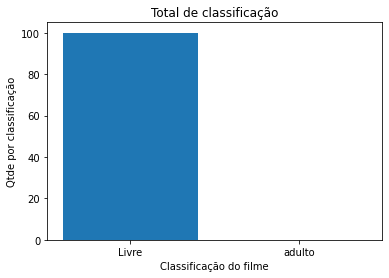

In [22]:
grupos = ['Livre', 'adulto']

valores = [round(sum(dataset.classificacao == 1) * 100 / len(dataset.classificacao),3),round(sum(dataset.classificacao == 0) * 100 / len(dataset.classificacao),3) ]

plt.xlabel("Classificação do filme")
plt.ylabel("Qtde por classificação")
plt.title("Total de classificação")

plt.bar(grupos, valores)
plt.show()

In [ ]:
# --------------------------------------------
Conforme observamos, 99,99% dos filmes possui classificação livre, logo, será avaliado retirar a features da avaliação/predição
# --------------------------------------------

In [ ]:
############## features de genero #############
# Quais são os generos mais comuns?

In [23]:
print ('acao: ', sum(dataset.acao == True), 'aventura: ',sum(dataset.aventura == True), 'animacao: ', sum(dataset.animacao == True))

acao:  6440 aventura:  3318 animacao:  1893


In [72]:
grupos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(grupos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
print (type (lista_totais))

while x < tam:
    genero = grupos[x]
    total_genero = sum(dataset[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)
print (type(lista_totais))
print (type(lista_totais))
total = zip (grupos, lista_totais)


total de generos 20
<class 'list'>
genero:  acao | 6440
genero:  aventura | 3318
genero:  animacao | 1893
genero:  comedia | 12608
genero:  crime | 3926
genero:  documentario | 3849
genero:  drama | 19680
genero:  familia | 2348
genero:  fantasia | 1987
genero:  estrangeiro | 1280
genero:  historia | 1246
genero:  horror | 4513
genero:  musical | 1489
genero:  misterio | 2082
genero:  romance | 6027
genero:  ficcao_cientifica | 2490
genero:  filmes_tv | 655
genero:  suspense | 6379
genero: gerra | 1119
genero:  ocidental | 914
<class 'list'>
<class 'list'>
(['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental'], [6440, 3318, 1893, 12608, 3926, 3849, 19680, 2348, 1987, 1280, 1246, 4513, 1489, 2082, 6027, 2490, 655, 6379, 1119, 914])


In [42]:
'''grupos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']'''
grupos = ['acao', 'aventura', 'animacao']

tam = len(grupos)
print (tam)
x = 0
while x <= tam:
    genero = grupos[x]
    print (genero)
    total_genero = sum(dataset.acao)
    
    print (total_genero)
    x += 1

3
acao
6440
aventura
6440
animacao
6440


IndexError: list index out of range

In [ ]:
grupos = ['açãp', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

valores = [sum(dataset.acao == True), sum(dataset.aventura == True), sum(dataset.animacao == True), sum(dataset.comedia == True), sum(dataset.crime == True), sum(dataset.documentario == True), sum(dataset.drama == True), sum(dataset.familia == True), sum(dataset.fantasia == True), sum(dataset.estrangeiro == True), sum(dataset.historia == True), sum(dataset.horror == True), sum(dataset.musical == True), sum(dataset.misterio == True), sum(dataset.romance == True), sum(dataset.ficcao_cientifica == True), sum(dataset.filmes_tv == True), sum(dataset.suspense == True), sum(dataset.gerra == True), sum(dataset.ocidental == True)]

plt.xlabel("Generos")
plt.ylabel("Qtde por genero")
plt.title("Total de filmes por gênero")
plt.xticks(rotation=90)

plt.bar(grupos, valores)
plt.show()

In [ ]:
# --------------------------------------------
Conforme observamos, o gênero DRAMA é o com maior quantidade no dataset, seguindo do comédia, ação e suspense
# --------------------------------------------

In [ ]:
# ----------------- avaliando cada feature contínua  ------------------------

ex: media
'ano_lancamento',  'despesas', 'popularidade', 'receita', 'duracao', 'novo_pais_producao', 'novo_idiomas_falados','novo_cia_producao', 'qtde_votos', 'media_votos'


In [ ]:
################## ano_lancamento ######################
#Quais anos de lançamento são os mais frequentes?

In [ ]:
dataset.ano_lancamento

In [ ]:
len(dataset.ano_lancamento.unique())

In [ ]:
# os 10 anos de lançamento mais frequentes
dataset.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10)

In [ ]:
# visualizando as 20 anos de lançamento mais frequentes
dataset.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(20).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Ano de lançamento dos filmes')
plt.title('Os 20 anos lançamentos mais frequentes')

In [ ]:
# --------------------------------------------
Conforme avaliamos, dos filmes do dataset, os anos com mais quantidade de filmes lançados foi 2014, com 1916 filmes, seguido de 2015 com 1855 e 2013 com 1851.
# --------------------------------------------

In [ ]:
############# despesas ###############

In [ ]:
dataset.despesas.describe()

In [ ]:
# os 10 anos de lançamento mais frequentes
dataset.groupby(by='despesas').size().sort_values(ascending = False).head(10)

In [ ]:
# --------------------------------------------
Conforme observamos, a maior parte dos filmes não possui informação de despesas. Portanto, será avaliado exclir a featere da análise e predição
# --------------------------------------------

In [ ]:
###################### popularidade #######################

In [ ]:
dataset.popularidade.head(3)

In [ ]:
dataset.popularidade.describe()

In [ ]:
# qtde de registros unicos de popularidade
len(dataset.popularidade.unique())

In [ ]:
# os 10 maiores valores de popularidade
dataset.groupby(by='popularidade').size().sort_values(ascending = False).head(10)

In [ ]:
################### receita #################

In [ ]:
dataset.receita.head(3)

In [ ]:
dataset.receita.describe()

In [ ]:
# qtde de registros únicos de receita
len(dataset.receita.unique())

In [ ]:
dataset.receita.value_counts(normalize=True)

In [ ]:
# Avaliando a feature alvo
dataset.media_votos.describe()

In [ ]:
print ('Qtde de registros unicos no target: ', len(dataset.media_votos.unique()))

In [ ]:
# ao plotar o target (media_votos), observamos que a maioria está entre 4 e 8 
dataset['media_votos'].sort_values(ascending = True).plot()

In [ ]:
dataset['qtde_votos'].plot()

In [ ]:
dataset.plot(x='media_votos',y='qtde_votos',kind='scatter', title='media_votos x qtde_votos',color='r')

In [ ]:
#media_votos ordenada
dataset.loc[(dataset['media_votos']>=9)].sort_values(by = 'media_votos', ascending=False)

In [ ]:
########################3 avaliando as features de genero ##################################
''''acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental' '''

#Visualizando todas as variáveis com target
x = dataset.groupby(['media_votos']).sum()

x['acao'].plot(kind = 'line',color='green', title='Total da classe/acao',grid=True, stacked=True)
x['aventura'].plot(kind = 'line',color='red', title='Total da classe/target por V2',grid=True, stacked=True)
x['animacao'].plot(kind = 'line',color='purple', title='Total da classe/target por V2',grid=True, stacked=True)
x['comedia'].plot(kind = 'line',color='aqua', title='Total da classe/target por V2',grid=True, stacked=True)
x['crime'].plot(kind = 'line',color='azure', title='Total da classe/target por V2',grid=True, stacked=True)
x['documentario'].plot(kind = 'line',color='brown', title='Total da classe/target por V2',grid=True, stacked=True)
x['drama'].plot(kind = 'line',color='coral', title='Total da classe/target por V2',grid=True, stacked=True)
x['familia'].plot(kind = 'line',color='darkblue', title='Total da classe/target por V2',grid=True, stacked=True)
x['fantasia'].plot(kind = 'line',color='gold', title='Total da classe/target por V2',grid=True, stacked=True)
x['estrangeiro'].plot(kind = 'line',color='grey', title='Total da classe/target por V2',grid=True, stacked=True)
x['historia'].plot(kind = 'line',color='lavender', title='Total da classe/target por V2',grid=True, stacked=True)
x['horror'].plot(kind = 'line',color='magenta', title='Total da classe/target por V2',grid=True, stacked=True)
x['musical'].plot(kind = 'line',color='beige', title='Total da classe/target por V2',grid=True, stacked=True)
x['misterio'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['romance'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['ficcao_cientifica'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['filmes_tv'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['suspense'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['gerra'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)
x['ocidental'].plot(kind = 'line',color='lime', title='Total da classe/target por V2',grid=True, stacked=True)

plt.xlabel("Generos")
plt.ylabel("media_votos")


In [ ]:
#round(df_2007_2018['media'].value_counts(normalize=True) * 100, 2).plot.bar()
#dados = dataset.loc[(dataset['media_votos']>=9)]
dados = dataset.loc[(dataset['media_votos']>=9)].sort_values(by = 'media_votos', ascending=False)

dados['media_votos'].value_counts().head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2000)

plt.ylabel('Media votos')
plt.xlabel('filmes')
plt.title('Os filmes com maior média de votos')

In [ ]:
dataset.groupby(by='media_votos').size() < = 6.0

In [ ]:
dataset.hist(column="media_votos",by="aventura",bins=30)


In [ ]:
# Filtrando os dados do tipo float:
dataset.select_dtypes(include=['float'])

In [ ]:
# Filtrando os dados do tipo object:
dataset.select_dtypes(include=['object'])

In [ ]:
 # ---------------- HIPÓTESE - Quais são os 20 filmes mais populares?

In [ ]:
len(round(filmes.popularidade,2).unique())

In [ ]:
plt.plot(filmes.popularidade.head(20), "bx")

In [ ]:
# Plotando o gráfico (Tentativa 1)
plt.plot(filmes.popularidade.head(10).sort_values(ascending=True), filmes.titulo_original.head(10))
plt.ylabel("Títulos")
plt.xlabel("Popularidade")
plt.title("Gráfico de Popularidade x Título (Tentativa 1)")

In [ ]:
# Plotando o gráfico (Tentativa 2)
plt.scatter(filmes.popularidade.head(20).sort_values(ascending=True), filmes.titulo_original.head(20))
plt.ylabel("Título")
plt.xlabel("Popularidade")
plt.title("Gráfico de Popularidade x Título (Tentativa 2)")

In [ ]:
 # ---------------- HIPÓTESE - Quais são os gêneros de filmes mais assistidos?

In [ ]:
#Qtde de filmes que possuem a categoria animacao
dataset.groupby(by='animacao').size()

In [ ]:
#qual foi a média de idade e a quantidade de passageiros que sobreviveram e que não sobreviveram por sexo. 
df.groupby(['Sex','Survived']).agg({'Age': np.mean, 'PassengerId': np.size})

In [ ]:
plt.plot(filmes.genero.head(20), "bx")

In [ ]:
 # ---------------- HIPÓTESE - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?

In [ ]:
 # ---------------- HIPÓTESE - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*